# Problem Statement
* The dataset comprises of  data for red wine quality on basisnon features that the wine has.
* The problem is a multiclass problem and we need to create model that predict the quality of the wine based on other features.
* Prediction result can be used by manufsacture to improve the quality of the wine and the consumer can be used knowing the quality of wine.

**Description of attributes:**
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler,normalize,minmax_scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score

from sklearn.model_selection import train_test_split


In [149]:
df=pd.read_csv('C:/Users/NBALUDEO/Desktop/ML project/Supervised ML/winequality-red.csv')

In [150]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [151]:
df.shape

(1599, 12)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [153]:
# Statistick of data


df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [154]:
# Data Sorted
df.sort_values(by=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


**Check data if there is missing or not**

In [155]:
def missing_value(dt):
    mydict={}
    lst=[]
    for i in dt.columns:
        if dt[i].isnull().sum()>0:
            mydict[i]=[(dt(i).isnull().sum()*100)/len(dt)][0][i]
            
    for j,k in mydict.items():
        lst.append(j)
    if len(lst)==0:
        message={"Message": "This dataset doesn't have any null values , kindly proceed with the EDA "}
        return message
    else:
            return mydict
missing_value(df)
    

{'Message': "This dataset doesn't have any null values , kindly proceed with the EDA "}

In [156]:
new_df=df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                     'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide','residual sugar':'residual_sugar'})

* There are no null values in this dataset

In [157]:
# Duplicate Entry check

In [158]:
new_df.duplicated().sum()

240

**Observation**

There are 240 duplicates. the quality rating for the same rating because given by different wine tester so there is possibility for similar review.

# EDA

Target variable is descreate and categorical nature.

In [159]:
# Rating count each rating column
new_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

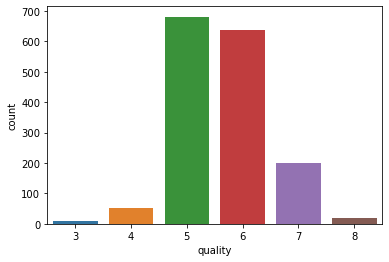

In [160]:
sns.countplot(new_df['quality'])

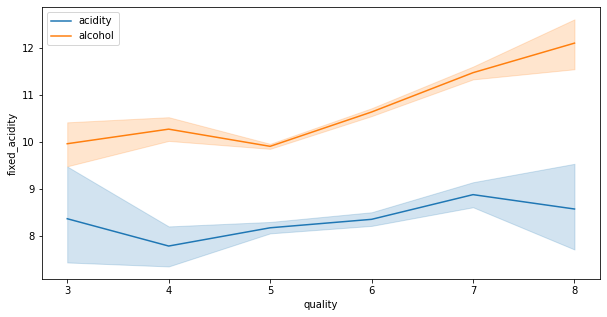

In [161]:
plt.figure(figsize=(10,5))
sns.lineplot(data=new_df,x='quality',y='fixed_acidity',label='acidity')
sns.lineplot(data=new_df,x='quality',y='alcohol',label='alcohol')
plt.legend()

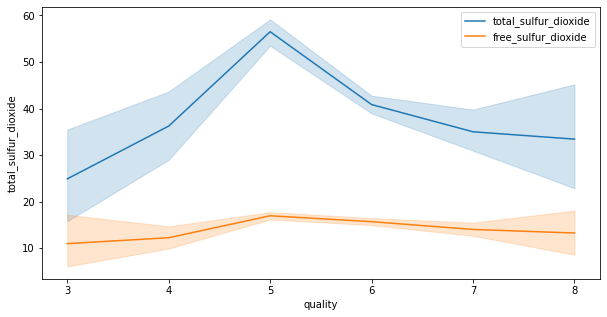

In [162]:

plt.figure(figsize=(10,5))
sns.lineplot(data=new_df,x='quality',y='total_sulfur_dioxide',label='total_sulfur_dioxide')
sns.lineplot(data=new_df,x='quality',y='free_sulfur_dioxide',label='free_sulfur_dioxide')
plt.legend()

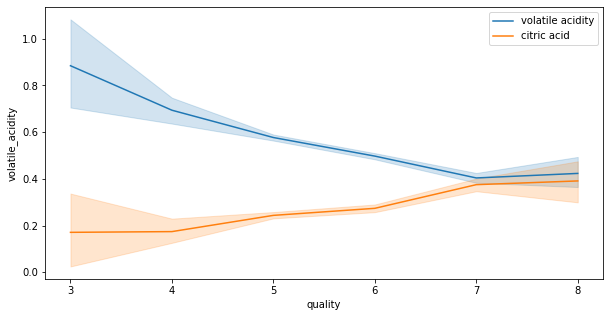

In [163]:
plt.figure(figsize=(10,5))
sns.lineplot(y='volatile_acidity',x='quality',data=new_df,label='volatile acidity')
sns.lineplot(y='citric_acid',x='quality',data=new_df,label='citric acid')
plt.legend()
plt.show()


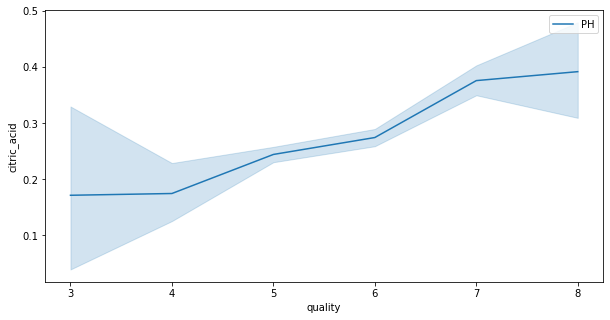

In [164]:
plt.figure(figsize=(10,5))
sns.lineplot(y='citric_acid',x='quality',data=new_df,label='PH')
plt.legend()

**Plot b/w total sulphur dioxide and free sulphur dioxide**

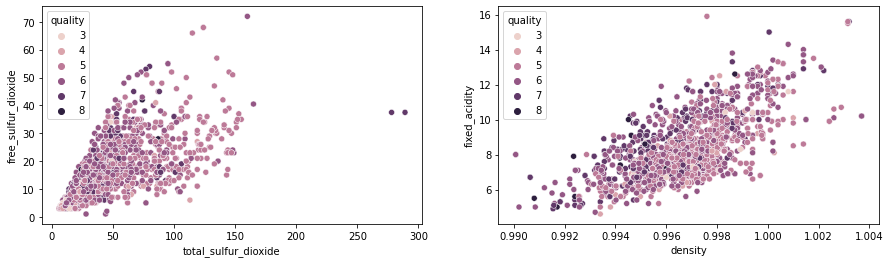

In [165]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.scatterplot(x='total_sulfur_dioxide',y='free_sulfur_dioxide',data=new_df,hue='quality')
plt.subplot(122)
sns.scatterplot(x='density',y='fixed_acidity',data=new_df,hue='quality')
plt.show()

**Quality of wine varies b/w 3-8,and the below plot give information about how the quality changes with respect to volatile acidity**

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

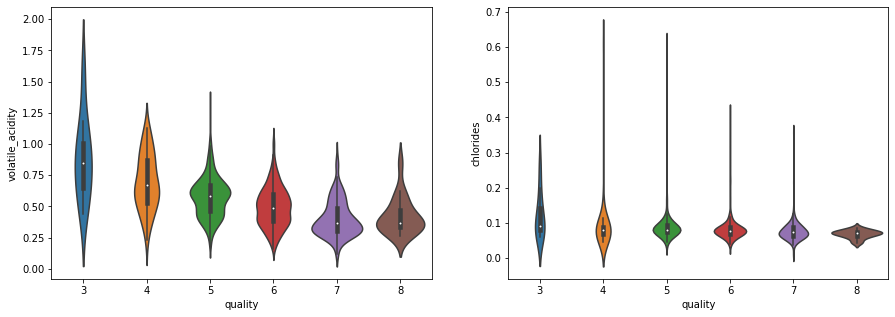

In [166]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x='quality',y='volatile_acidity',data=new_df)
plt.subplot(1,2,2)
sns.violinplot(x='quality',y='chlorides',data=new_df)

 Observation 

* The quality has most rating gives to 5,6,7 

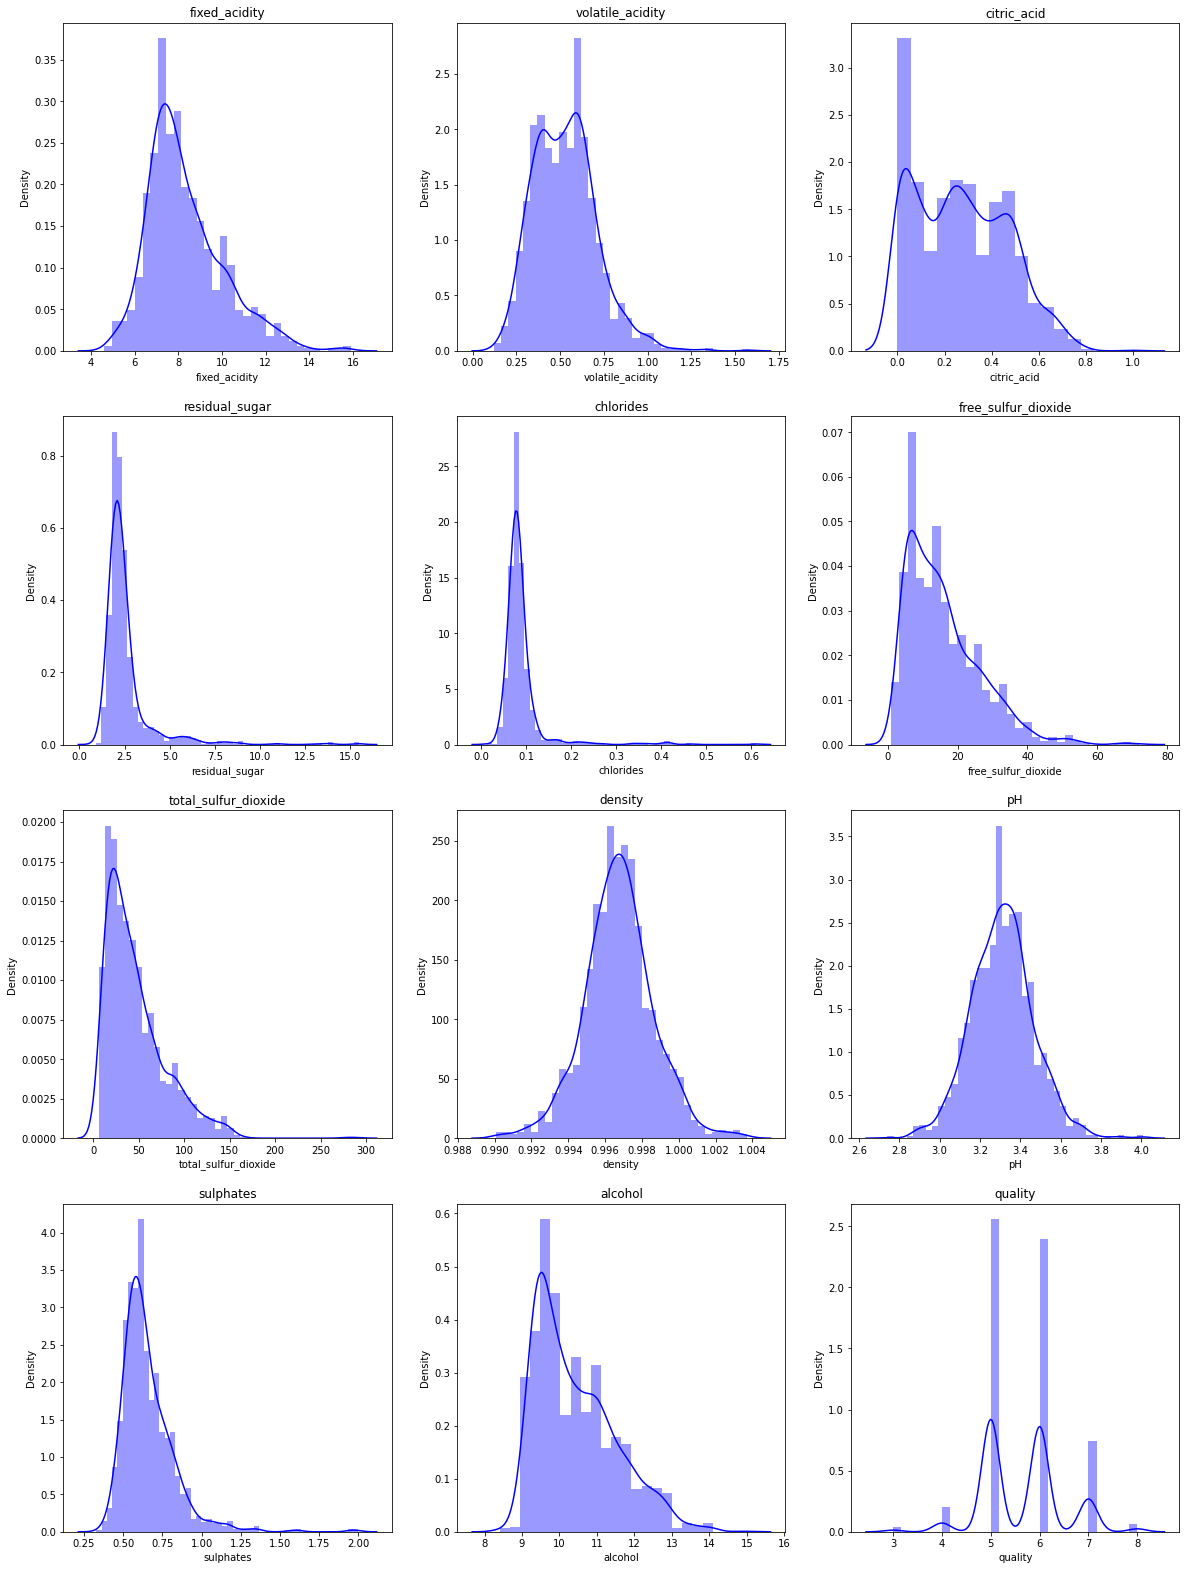

In [167]:
column=new_df.iloc[:]
plt.figure(figsize=(20,35))
for i in range(len(column.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(column[column.columns[i]],color='b')
    plt.title(column.columns[i])

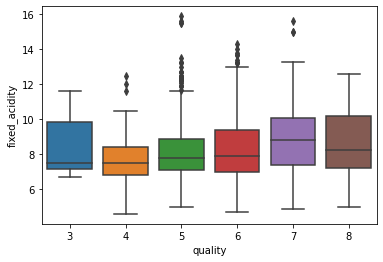

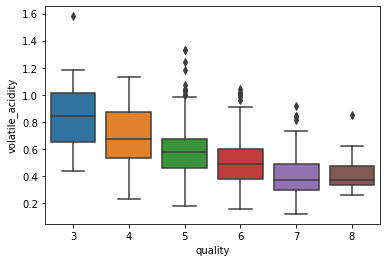

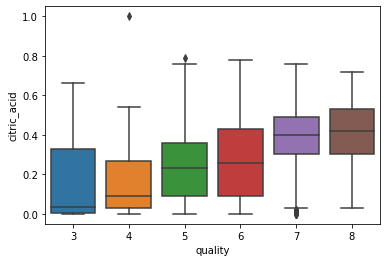

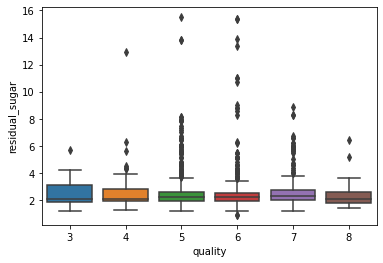

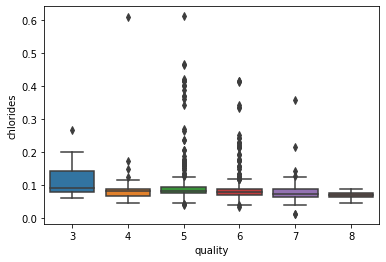

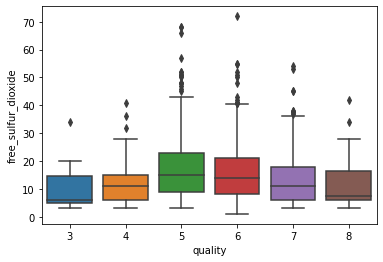

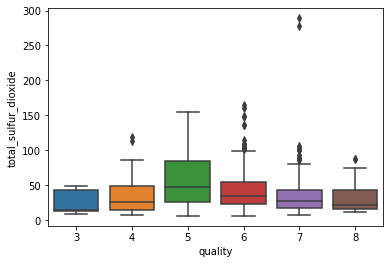

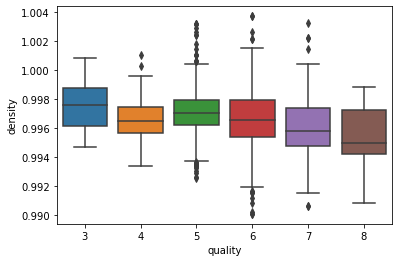

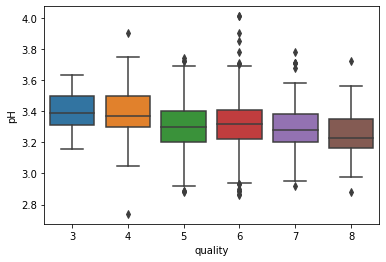

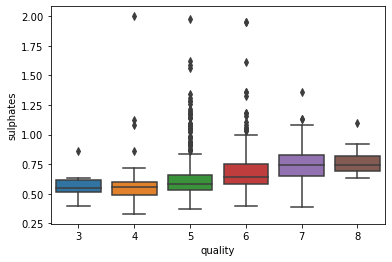

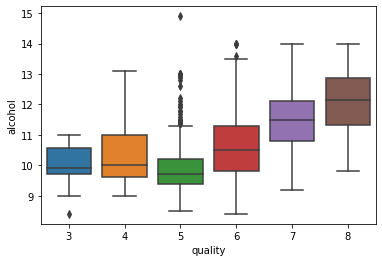

In [168]:
for i in new_df.columns:
    if i=='quality':
        break
        
    sns.boxplot('quality',i,data=new_df)
    plt.show()

here we saw the distrubution polt some data are normal distribution some are not that's why we will transform those column

compair feature columns befor and after log transform apply

<AxesSubplot:>

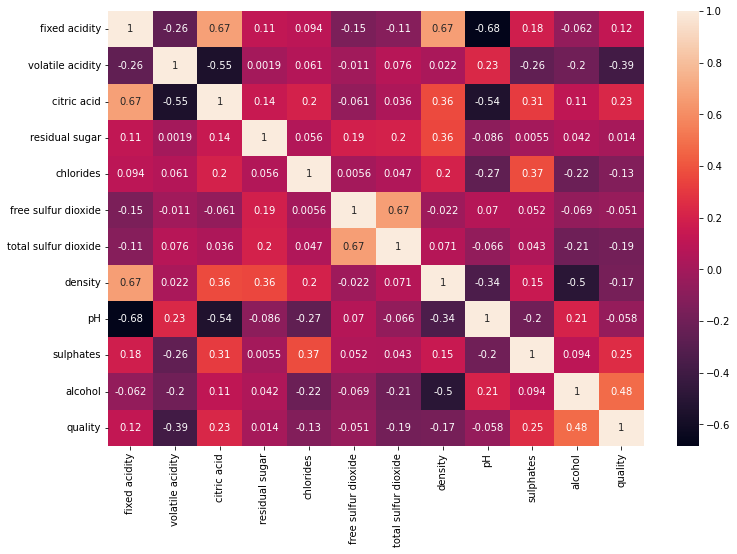

In [169]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Data Spliting for training and testing

In [170]:
X=df.drop('quality',axis=1)
y=df.quality

Splitting training abd test data

In [171]:
#kfold
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True,random_state=50)

In [172]:
print('The shape of X train data',X_train.shape,'\n The shape of test data',X_test.shape)
print('The shape of y train data',y_train.shape,'\n The shape of y test data',y_test.shape)

The shape of X train data (1119, 11) 
 The shape of test data (480, 11)
The shape of y train data (1119,) 
 The shape of y test data (480,)


# Feature Scaling

In [173]:
def standard_scalar(X_train,X_test):
    scalar=StandardScaler()
    X_train_scale=scalar.fit_transform(X_train)
    X_test_scale=scalar.transform(X_test)
    
    return X_train_scale,X_test_scale

X_train_scale,X_test_scale=standard_scalar(X_train,X_test)


In [174]:
X_test_scale

array([[ 1.17518093, -1.08733917,  1.84962191, ..., -0.33448575,
         0.45809747,  0.67561608],
       [-1.21836851,  0.31268445, -1.40913889, ...,  1.62070954,
         1.03830241, -0.97978919],
       [ 0.37733112, -0.69533256,  0.71164195, ..., -0.59517845,
        -0.35418945,  1.59528567],
       ...,
       [ 1.17518093, -0.47132878,  2.36688553, ..., -0.92104434,
         1.0963229 ,  1.41135175],
       [-0.87643288,  0.3686854 , -0.89187527, ...,  0.6431119 ,
         0.05195401, -0.70388831],
       [ 0.43432039, -1.3673439 ,  0.97027376, ..., -0.85587116,
        -0.35418945,  0.3997152 ]])

In [175]:
X_train_scale

array([[ 0.71926675, -1.08733917,  1.28063193, ...,  0.31724602,
         0.57413845,  1.77921959],
       [-0.19256161,  0.42468634, -0.99532799, ..., -0.59517845,
        -1.68866081,  2.33102134],
       [-0.59148651,  0.3686854 , -0.06425348, ..., -0.2041394 ,
        -0.8183534 , -0.5199544 ],
       ...,
       [-0.76245433, -0.91933634, -0.32288529, ...,  0.57793872,
        -0.70231241, -0.33602048],
       [-0.13557234,  1.46070383,  1.28063193, ..., -0.66035163,
         0.167995  , -1.07175615],
       [-0.47750797, -0.80733445,  1.53926374, ...,  0.31724602,
        -0.64429192,  0.85954999]])

# Support vector mahine algorithm

In [176]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [177]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC(kernel='linear')
#gnb = GaussianNB()
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier()

model_list = [lr,dt,rf,svm,knn,gbc]


train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(X_train_scale,y_train)
    ytrain_pred = i_model.predict(X_train_scale)
    ytest_pred = i_model.predict(X_test_scale)
    train_acc.append(accuracy_score(y_train,ytrain_pred))
    test_acc.append(accuracy_score(y_test,ytest_pred))

In [178]:
model_summary=pd.DataFrame({'Model':['lr','dt','rf','svm','knn','gbc'],'Train_accuracy':train_acc,'Test_acuracy':test_acc})
model_summary

,Model,Train_accuracy,Test_acuracy
0,lr,0.615728,0.583333
1,dt,1.000000,0.612500
2,rf,1.000000,0.689583
3,svm,0.595174,0.585417
4,knn,0.709562,0.589583
5,gbc,0.905273,0.645833


# hyperparameter Tuning on svm

In [179]:
from sklearn.model_selection import GridSearchCV
param= {'C': [1,1.5,2,2.5], 'gamma': [0.1,0.5,0.6,1],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(estimator=svm, param_grid=param,scoring='accuracy',cv=5).fit(X_train_scale,y_train)


In [180]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [181]:
svc_model2=SVC(C=1,gamma=0.6,kernel='rbf')
svc_model2=svm.fit(X_train_scale,y_train)

In [182]:
ytrain_pred_svm=svc_model2.predict(X_train_scale)
ytest_pred_svm=svc_model2.predict(X_test_scale)


In [183]:
# Accuracy Score
print("The Training accuracy score of regularized SVM  is: ",accuracy_score(y_train,ytrain_pred_svm))
print("The Testing accuracy score of regularized SVM is: ",accuracy_score(y_test,ytest_pred_svm))

The Training accuracy score of regularized SVM  is:  0.5951742627345844
The Testing accuracy score of regularized SVM is:  0.5854166666666667


# Hyper parameter tunning on DecisionTreeClassifier model

In [216]:
dt = DecisionTreeClassifier()
params=[{'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,4),
             }]
grd = GridSearchCV(estimator=dt,param_grid=params,scoring='accuracy',cv=10)

dt_model = grd.fit(X_train_scale,y_train)

dt_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

In [222]:
dt = DecisionTreeClassifier(criterion=dt_model.best_params_.get('criterion'),
                           max_depth=dt_model.best_params_.get('max_depth'),
                           min_samples_leaf=dt_model.best_params_.get('max_depth'))

dt_model = dt.fit(X_train_scale,y_train)

ytrain_pred_dt = dt_model.predict(X_train_scale)
ytest_pred_dt = dt_model.predict(X_test_scale)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

In [218]:
print("The Training accuracy score of regularized Decision tree is: ",accuracy_score(y_train,y_train_pred_dt))
print("The Testing accuracy score of regularized Decision tree is: ",accuracy_score(y_test,y_test_pred_dt))

The Training accuracy score of regularized Decision tree is:  0.6228775692582663
The Testing accuracy score of regularized Decision tree is:  0.5791666666666667


# Hyperparameter tunning on Random Forest Model

In [188]:
rf = RandomForestClassifier()
params=[{'n_estimators':[50,100,150,200],
       'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,5),
             }]

grd = GridSearchCV(estimator=rf,param_grid=params,cv=3)

rf_model = grd.fit(X_train_scale,y_train)

rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'n_estimators': 50}

In [191]:
rf = RandomForestClassifier(criterion=rf_model.best_params_.get('criterion'),
                           max_depth=rf_model.best_params_.get('max_depth'),
                           min_samples_leaf=rf_model.best_params_.get('max_depth'),
                           n_estimators=rf_model.best_params_.get('n_estimators'))

rf_model = rf.fit(X_train_scale,y_train)

y_train_pred_rf = rf_model.predict(X_train_scale)
y_test_pred_rf = rf_model.predict(X_test_scale)

In [193]:
print("The Training accuracy score of regularized Randomforest is: ",accuracy_score(y_train,y_train_pred_rf))
print("The Testing accuracy score of regularized Randomforest is: ",accuracy_score(y_test,y_test_pred_rf))

The Training accuracy score of regularized Randomforest is:  0.646112600536193
The Testing accuracy score of regularized Randomforest is:  0.61875


In [195]:
lr=LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100,150, 200]
    }
]

clf = GridSearchCV(lr, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

lr_model=clf.fit(X_train_scale,y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


In [196]:
lr_model.best_params_

{'C': 0.08858667904100823, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}

In [199]:
lr=LogisticRegression(penalty='l2',
                      class_weight=lr_model.best_params_.get('class_weight'),
                      solver=lr_model.best_params_.get('solver'),
                      max_iter=100)

lr_model_hp=lr.fit(X_train_scale,y_train)

y_train_pred_lr = lr_model_hp.predict(X_train_scale)
y_test_pred_lr = lr_model_hp.predict(X_test_scale)

In [214]:
print("The Training accuracy score of regularized Logisticregression is: ",accuracy_score(y_train,y_train_pred_lr))
print("The Testing accuracy score of regularized Logisticregression is: ",accuracy_score(y_test,y_test_pred_lr))

The Training accuracy score of regularized Logisticregression is:  0.6157283288650581
The Testing accuracy score of regularized Logisticregression is:  0.5833333333333334


# Hyper parameter tunning on gradient boost classifier

In [113]:
gbc_param={'n_estimators':[10,20,30,40,50,55,60,70,80,90],
          'learning_rate':[0.001,0.002,0.006,0.05,0.09],
          'max_depth':range(2,16,2),
          'min_samples_leaf':range(1,10,2)}

In [ ]:
grid_gbc_hp.best_params_

In [ ]:
gbc_parameter=GradientBoostingClassifier(learning_rate=0.09,max_depth=10,min_samples_leaf=7,n_estimators=40)

y_train_pred_lr = gbc_parameter.predict(X_train_scale)
y_test_pred_lr = gbc_parameter.predict(X_test_scale)

In [226]:
hp_summary=pd.DataFrame()
hp_summary['model']=pd.Series(['svm','dt','rfc','lr'])
hp_summary['train_accuracy']=pd.Series([accuracy_score(y_train,ytrain_pred_svm),
                                      accuracy_score(y_train,y_train_pred_dt),
                                      accuracy_score(y_train,y_train_pred_rf),
                                      accuracy_score(y_train,y_train_pred_lr)])
hp_summary['test_accuracy']=pd.Series([accuracy_score(y_test,ytest_pred_svm),
                                      accuracy_score(y_test,y_test_pred_dt),
                                      accuracy_score(y_test,y_test_pred_rf),
                                      accuracy_score(y_test,y_test_pred_lr)])

# find the accuracy using hyperparameter tunning

In [227]:
hp_summary

,model,train_accuracy,test_accuracy
0,svm,0.595174,0.585417
1,dt,0.622878,0.579167
2,rfc,0.646113,0.618750
3,lr,0.615728,0.583333


In [228]:
model_summary

,Model,Train_accuracy,Test_acuracy
0,lr,0.615728,0.583333
1,dt,1.000000,0.612500
2,rf,1.000000,0.689583
3,svm,0.595174,0.585417
4,knn,0.709562,0.589583
5,gbc,0.905273,0.645833
